https://erikbern.com/2018/10/08/the-hackers-guide-to-uncertainty-estimates.html

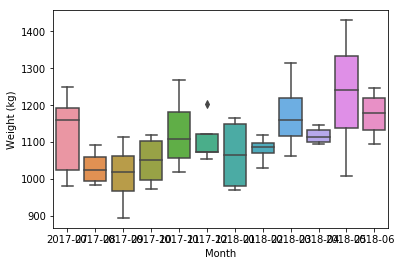

In [28]:
import numpy, datetime, random, seaborn, pandas
import matplotlib.pyplot as pyplot

def generate_time_series(k=200,m=1000,sigma=100,n=50,
                        start_date=datetime.date(2017,7,1)):
    xs=numpy.linspace(0,1,n,endpoint=False)
    ys=[k*x+m+random.gauss(0,sigma) for x in xs] # weight of an elephant ...
    ts=[start_date+datetime.timedelta(x)*365 for x in xs] # ... during a period
    x_scale = numpy.linspace(-1,2,500) # for plotting
    t_scale = [start_date + datetime.timedelta(x)*365 for x in x_scale]
    return xs, ys, ts, x_scale, t_scale

xs, ys, ts, x_scale, y_scale = generate_time_series()

pyplot.scatter(ts, ys, alpha=0.5, s=20)

d=pandas.DataFrame({"x": xs,
                   "t": ts,
                   "Weight (kg)": ys})
d["Month"] = d["t"].apply(lambda t: t.strftime("%Y-%m"))
seaborn.boxplot(data = d, x="Month", y="Weight (kg)")

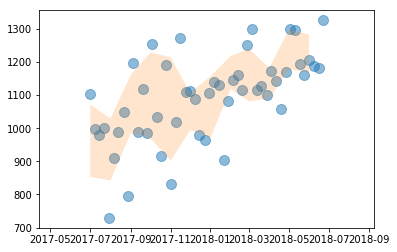

In [27]:
def plot_confidence_interval(observations_by_group):
    groups=list(sorted(observations_by_group.keys()))
    lo_bound=[]
    hi_bound=[]
    for group in groups:
        series = observations_by_group[group]
        mu, std, n = numpy.mean(series), numpy.std(series), len(series)
        lo_bound.append(mu-1.96*std*n**-0.5)
        hi_bound.append(mu+1.96*std*n**-0.5)
    pyplot.fill_between(groups, lo_bound,hi_bound, alpha=0.2)
    
pyplot.scatter(ts,ys,alpha=0.5,s=100)
observations_by_month={}
for month, y in zip(d["Month"],d["Weight (kg)"]):
    observations_by_month.setdefault(month,[]).append(y)
plot_confidence_interval(observations_by_month)